# Naive bayes

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

In [2]:
# For reproducibility
np.random.seed(1000)

nb_samples = 550


def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()


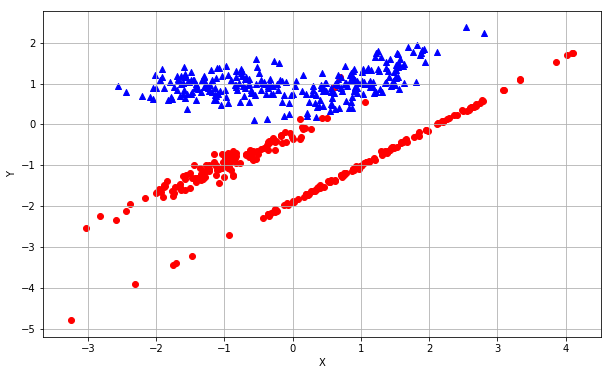

白努力單純貝氏: 0.920
白努力單純貝氏交叉值: 0.933
[0 1 0 1]


In [3]:
if __name__ == '__main__':
    # 建立資料
    X, Y = make_classification(n_samples=nb_samples,
                               n_features=2, n_informative=2, n_redundant=0)
    show_dataset(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

    # 建立和訓練白努力單純貝氏Naive Bayes分類
    bnb = BernoulliNB(binarize=0.0)
    bnb.fit(X_train, Y_train)

    print('白努力單純貝氏: %.3f' % bnb.score(X_test, Y_test))

    bnb_scores = cross_val_score(bnb, X, Y, scoring='accuracy', cv=10)
    print('白努力單純貝氏交叉值: %.3f' % bnb_scores.mean())

    # 預測值
    data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Yp = bnb.predict(data)
    print(Yp)